In [20]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [24]:
#import start and end dates then TLT and IVV price and dividend data from yahoo finance
start = datetime(2003,1,1)
end = datetime(2020,6,1)
TLT = data.DataReader("TLT", 'yahoo', start, end)
TLT_div = data.DataReader("TLT", 'yahoo-dividends', start, end)
IVV= data.DataReader("IVV", 'yahoo', start, end)
IVV_div= data.DataReader("IVV", 'yahoo-dividends', start, end)

In [37]:
#clean up dataset
port=pd.concat([TLT["Close"],TLT_div["value"],IVV["Close"],IVV_div["value"]], axis=1,keys=["TLT","TLT_Div","IVV","IVV_Div"])
port["TLT_Div"]=port["TLT_Div"].fillna(0)
port["IVV_Div"]=port["IVV_Div"].fillna(0)
#Adding dividends to price appreciation on a daily percent return basis
port["TLT_return"]=port["TLT"].pct_change()+port["TLT_Div"]/port["TLT"]
port["IVV_return"]=port["IVV"].pct_change()+port["IVV_Div"]/port["IVV"]

In [38]:
port

,TLT,TLT_Div,IVV,IVV_Div,TLT_return,IVV_return
2003-01-02,86.279999,0.00,91.160004,0.0,NaN,NaN
2003-01-03,86.480003,0.00,91.370003,0.0,0.002318,0.002304
2003-01-06,86.250000,0.00,93.070000,0.0,-0.002660,0.018606
2003-01-07,86.559998,0.00,92.510002,0.0,0.003594,-0.006017
2003-01-08,86.989998,0.00,91.430000,0.0,0.004968,-0.011674
...,...,...,...,...,...,...
2020-05-26,163.330002,0.00,300.170013,0.0,-0.013410,0.012685
2020-05-27,163.029999,0.00,304.549988,0.0,-0.001837,0.014592
2020-05-28,162.429993,0.00,303.950012,0.0,-0.003680,-0.001970
2020-05-29,163.589996,0.00,305.179993,0.0,0.007142,0.004047


Visualizations

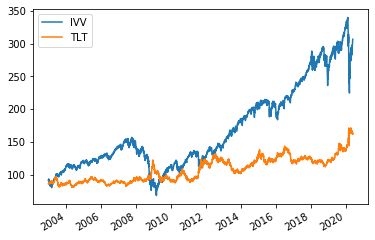

In [39]:
port[["IVV", "TLT"]].plot()

In [40]:
returns = port[["IVV_return", "TLT_return"]].copy()

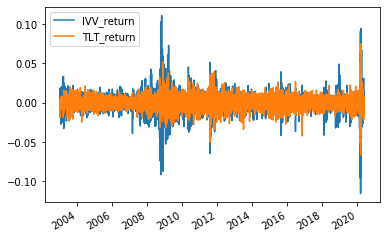

In [41]:
returns.plot()

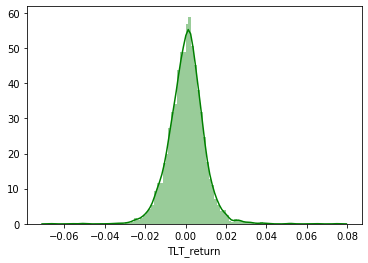

In [42]:
sns.distplot(returns['TLT_return'],color='green',bins=100)

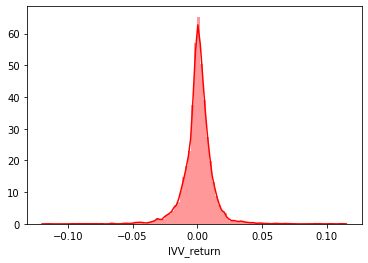

In [43]:
sns.distplot(returns['IVV_return'],color='red',bins=100)

C:\Users\avid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


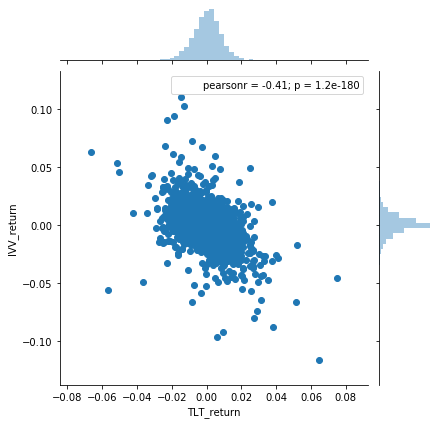

In [44]:
sns.jointplot(returns['TLT_return'],returns['IVV_return']).annotate(stats.pearsonr)

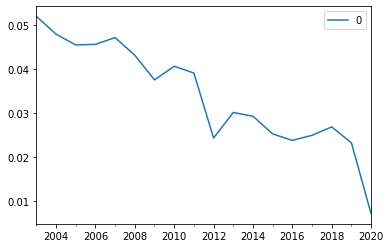

In [45]:
#dividends on a portfolio of long term treasury debt
pd.DataFrame(port["TLT_Div"]/port["TLT"]).resample('AS').sum().plot()

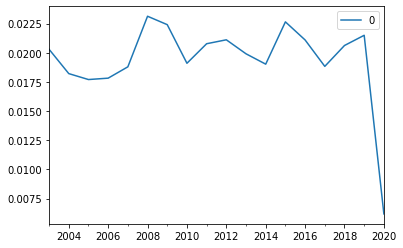

In [46]:
#dividends on S&P
pd.DataFrame(port["IVV_Div"]/port["IVV"]).resample('AS').sum().plot()